# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [12]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [13]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

579

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [22]:
# OpenWeatherMap API Key
config = api_key

# Starting URL for Weather Map API Call
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + api_key 
units = "imperial"
#List of City data
lat=[]
lon=[]
temp=[]
humidity=[] 
cloudy=[]
windspeed=[]
count=0
cityname=[]
dt=[]


query_url = f"{url}&units={units}&q="
query_url + city
response = requests.get(query_url + city).json()
response


{'coord': {'lon': 115.35, 'lat': -33.64},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01d'}],
 'base': 'stations',
 'main': {'temp': 71.94,
  'pressure': 1011,
  'humidity': 27,
  'temp_min': 70,
  'temp_max': 73.99},
 'wind': {'speed': 11.12, 'deg': 137},
 'clouds': {'all': 0},
 'dt': 1573444240,
 'sys': {'type': 3,
  'id': 2011706,
  'country': 'AU',
  'sunrise': 1573420238,
  'sunset': 1573469674},
 'timezone': 28800,
 'id': 2075265,
 'name': 'Busselton',
 'cod': 200}

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [23]:
City = []
Country = []
Lat = []
Lng = []
Date = []
Humidity = []
Cloudiness = []
Max_Temp = []
Windspeed = []

index = 0

# Loop through the cities list using the api and append the selected info to the lists
for city in cities:
    print(f"Retrieving Results for Index {index}: {city}.")
    try:
        response = requests.get(query_url + city).json()
        
       
        # get info for each list created above and append to the list
        City.append(city)
        Country.append(response['sys']['country'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Date.append(response['dt'])
        Humidity.append(response["main"]['humidity'])
        Cloudiness.append(response['clouds']['all'])
        Max_Temp.append(response['main']['temp_max'])
        Windspeed.append(response['wind']['speed'])
        
    except:
        print(f"     Missing field/result for {city}. Skipping.")
    
    index=index+1 
    time.sleep(7.8)

Retrieving Results for Index 0: yanji.
Retrieving Results for Index 1: busselton.
Retrieving Results for Index 2: namibe.
Retrieving Results for Index 3: thompson.
Retrieving Results for Index 4: ushuaia.
Retrieving Results for Index 5: nizhneyansk.
     Missing field/result for nizhneyansk. Skipping.
Retrieving Results for Index 6: huarmey.
Retrieving Results for Index 7: tall kayf.
Retrieving Results for Index 8: hermanus.
Retrieving Results for Index 9: butaritari.
Retrieving Results for Index 10: ginda.
Retrieving Results for Index 11: saint-philippe.
Retrieving Results for Index 12: maniitsoq.
Retrieving Results for Index 13: ust-maya.
Retrieving Results for Index 14: castro.
Retrieving Results for Index 15: punta arenas.
Retrieving Results for Index 16: roebourne.
Retrieving Results for Index 17: ponta delgada.
Retrieving Results for Index 18: albany.
Retrieving Results for Index 19: dingle.
Retrieving Results for Index 20: jamestown.
Retrieving Results for Index 21: fortuna.
Ret

Retrieving Results for Index 172: aklavik.
Retrieving Results for Index 173: salalah.
Retrieving Results for Index 174: klaksvik.
Retrieving Results for Index 175: merauke.
Retrieving Results for Index 176: bandarbeyla.
Retrieving Results for Index 177: santa maria.
Retrieving Results for Index 178: zhanatas.
     Missing field/result for zhanatas. Skipping.
Retrieving Results for Index 179: nikolskoye.
Retrieving Results for Index 180: seymchan.
Retrieving Results for Index 181: gourcy.
Retrieving Results for Index 182: trincomalee.
Retrieving Results for Index 183: xining.
Retrieving Results for Index 184: igdir.
Retrieving Results for Index 185: serov.
Retrieving Results for Index 186: bambous virieux.
Retrieving Results for Index 187: san cristobal.
Retrieving Results for Index 188: clyde river.
Retrieving Results for Index 189: verdun.
Retrieving Results for Index 190: georgiyevka.
Retrieving Results for Index 191: igrim.
Retrieving Results for Index 192: muroto.
Retrieving Result

Retrieving Results for Index 339: puerto baquerizo moreno.
Retrieving Results for Index 340: hobyo.
Retrieving Results for Index 341: fort nelson.
Retrieving Results for Index 342: khani.
Retrieving Results for Index 343: vicosa do ceara.
Retrieving Results for Index 344: north bend.
Retrieving Results for Index 345: katha.
     Missing field/result for katha. Skipping.
Retrieving Results for Index 346: bridgetown.
Retrieving Results for Index 347: yavaros.
Retrieving Results for Index 348: makat.
Retrieving Results for Index 349: lima.
Retrieving Results for Index 350: ban nahin.
Retrieving Results for Index 351: ngukurr.
     Missing field/result for ngukurr. Skipping.
Retrieving Results for Index 352: iquique.
Retrieving Results for Index 353: arlit.
Retrieving Results for Index 354: husavik.
Retrieving Results for Index 355: haines junction.
Retrieving Results for Index 356: olafsvik.
     Missing field/result for olafsvik. Skipping.
Retrieving Results for Index 357: chulym.
Retrie

Retrieving Results for Index 508: joshimath.
Retrieving Results for Index 509: izmaylovo.
Retrieving Results for Index 510: mozarlandia.
Retrieving Results for Index 511: koudougou.
Retrieving Results for Index 512: poim.
Retrieving Results for Index 513: santa ana.
Retrieving Results for Index 514: beira.
Retrieving Results for Index 515: tuatapere.
Retrieving Results for Index 516: mount gambier.
Retrieving Results for Index 517: jumla.
Retrieving Results for Index 518: orsta.
Retrieving Results for Index 519: ojinaga.
Retrieving Results for Index 520: belaya gora.
Retrieving Results for Index 521: pimenta bueno.
Retrieving Results for Index 522: novyy urengoy.
Retrieving Results for Index 523: tazovskiy.
Retrieving Results for Index 524: maragogi.
Retrieving Results for Index 525: hunza.
     Missing field/result for hunza. Skipping.
Retrieving Results for Index 526: barguzin.
Retrieving Results for Index 527: pombas.
Retrieving Results for Index 528: marcona.
     Missing field/res

In [30]:
weather_data = {"city":cityname,"latitude":lat,"longitude":lon,"date":dt,"temperature": temp,"humidity":humidity,"cloudiness":cloudy,"windspeed":windspeed}
weather_data = pd.DataFrame(weather_data)
weather_data


,city,latitude,longitude,date,temperature,humidity,cloudiness,windspeed


### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

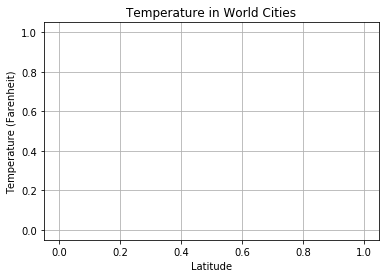

In [32]:
 # Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["temperature"], marker="o")

# Incorporate the other graph properties
plt.title("Temperature in World Cities")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("TempInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Humidity Plot

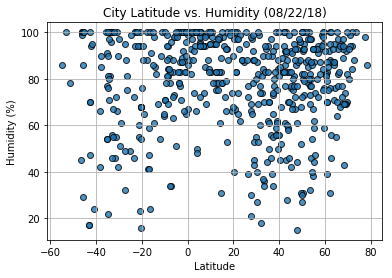

In [7]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["humidity"], marker="o")

# Incorporate the other graph properties
plt.title("Humidity in World Cities")
plt.ylabel("humidity")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("HumidityInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Cloudiness Plot

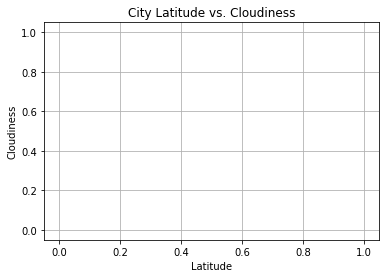

In [27]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["cloudiness"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("CloudinessInWorldCities.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

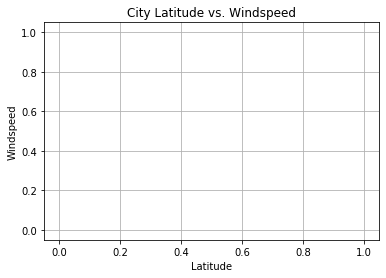

In [33]:
# Build a scatter plot for each data type
plt.scatter(weather_data["latitude"], weather_data["windspeed"], marker="o")

# Incorporate the other graph properties
plt.title("City Latitude vs. Windspeed")
plt.ylabel("Windspeed")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("WindspeedInWorldCities.png")

# Show plot
plt.show()